In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoking-status-prediction-b1/sample_submission.csv
/kaggle/input/smoking-status-prediction-b1/train.csv
/kaggle/input/smoking-status-prediction-b1/test.csv


In [ ]:
# https://www.kaggle.com/competitions/smoking-status-prediction-b1

In [17]:
data = pd.read_csv("/kaggle/input/smoking-status-prediction-b1/train.csv")
test = pd.read_csv("/kaggle/input/smoking-status-prediction-b1/test.csv")
ss = pd.read_csv("/kaggle/input/smoking-status-prediction-b1/sample_submission.csv")
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,M,70,175,65,89.8,0.8,1.0,1,1,...,15.5,5,1.3,29,18,53,Y,0,Y,1
1,2,M,40,170,65,86.0,1.2,1.0,1,1,...,15.3,1,1.2,26,23,21,Y,1,Y,1
2,3,M,20,170,70,83.0,1.0,1.0,1,1,...,14.2,1,1.0,17,11,12,Y,0,N,0
3,4,F,60,145,50,77.0,0.4,0.5,1,2,...,12.8,1,0.5,26,12,13,Y,0,N,0
4,5,F,40,160,70,82.9,0.9,0.7,1,1,...,13.8,1,0.9,16,25,20,Y,0,N,0


In [3]:
data.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['oral'] = label_encoder.fit_transform(data['oral'])
data['tartar'] = label_encoder.fit_transform(data['tartar'])

test['gender'] = label_encoder.fit_transform(test['gender'])
test['oral'] = label_encoder.fit_transform(test['oral'])
test['tartar'] = label_encoder.fit_transform(test['tartar'])

In [5]:
X = data.drop(['smoking'], axis=1)
y = data.loc[:, 'smoking']
X.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,1,1,70,175,65,89.8,0.8,1.0,1,1,...,64,15.5,5,1.3,29,18,53,0,0,1
1,2,1,40,170,65,86.0,1.2,1.0,1,1,...,120,15.3,1,1.2,26,23,21,0,1,1
2,3,1,20,170,70,83.0,1.0,1.0,1,1,...,90,14.2,1,1.0,17,11,12,0,0,0
3,4,0,60,145,50,77.0,0.4,0.5,1,2,...,165,12.8,1,0.5,26,12,13,0,0,0
4,5,0,40,160,70,82.9,0.9,0.7,1,1,...,139,13.8,1,0.9,16,25,20,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 26)
(32000,)
(8000, 26)
(8000,)


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
# sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

testdata_sc = sc.transform(test)

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bag_ = BaggingClassifier(random_state=42)
bag_.fit(X_train_sc, y_train)
accuracy_score(bag_.predict(X_test_sc), y_test)

0.785625

In [20]:
params = bag_.get_params()
params

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [34]:
from sklearn.tree import DecisionTreeClassifier

bag_1 = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag_1.fit(X_train_sc, y_train)
accuracy_score(bag_.predict(X_test_sc), y_test)

0.785625

In [35]:
from sklearn.ensemble import RandomForestClassifier

bag_1 = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
bag_1.fit(X_train_sc, y_train)
accuracy_score(bag_.predict(X_test_sc), y_test)

0.785625

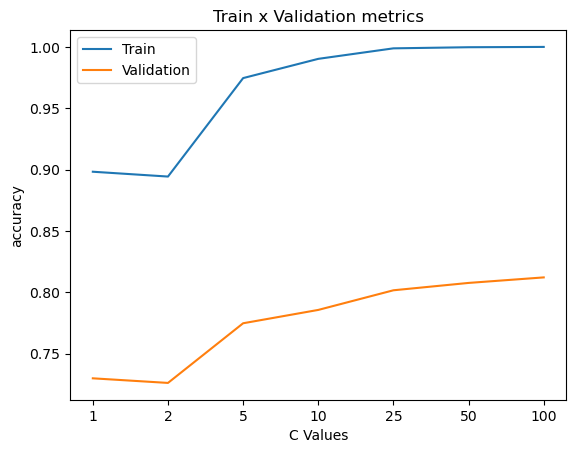

In [27]:
n_est = [1, 2, 5, 10, 25, 50, 100]

accuracy_list_train = []
accuracy_list_test = []

for i in n_est:
    model = BaggingClassifier(n_estimators= i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('C Values')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_est )),labels=n_est)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# thus, 5 is optimal value

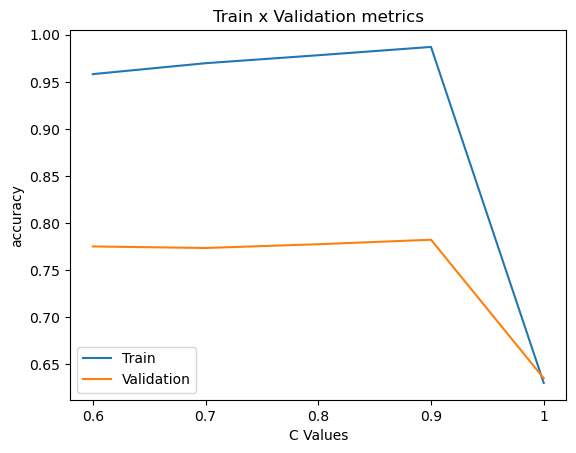

In [29]:
max_samp = [0.6, 0.7, 0.8, 0.9, 1]

accuracy_list_train = []
accuracy_list_test = []

for i in max_samp:
    model = BaggingClassifier(max_samples=i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('C Values')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_samp)),labels=max_samp)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# 0.9 seems to be the best value

In [33]:
bag_best = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators = 5,
                            max_samples = 0.9)

bag_best.fit(X_train_sc, y_train)
accuracy_score(bag_best.predict(X_test_sc), y_test)

0.768625

In [40]:
from sklearn.ensemble import AdaBoostClassifier

bagg = AdaBoostClassifier(random_state=42)
bagg.fit(X_train_sc, y_train)
accuracy_score(model.predict(X_test_sc), y_test)

0.635375

In [39]:
params = bagg.get_params()
params

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [41]:
bagg_1 = AdaBoostClassifier(algorithm='SAMME.R', random_state=42)
bagg_1.fit(X_train_sc, y_train)
accuracy_score(model.predict(X_test_sc), y_test)

0.635375

In [42]:
bagg_1 = AdaBoostClassifier(algorithm='SAMME', random_state=42)
bagg_1.fit(X_train_sc, y_train)
accuracy_score(model.predict(X_test_sc), y_test)

0.635375

In [ ]:
# algorithm doesnt affect accuracy here

In [43]:
bagg_1 = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bagg_1.fit(X_train_sc, y_train)
accuracy_score(model.predict(X_test_sc), y_test)

0.635375

In [45]:
bagg_1 = AdaBoostClassifier(estimator=RandomForestClassifier(), random_state=42)
bagg_1.fit(X_train_sc, y_train)
accuracy_score(model.predict(X_test_sc), y_test)

0.635375

In [ ]:
# estimator doesnt affect accuracy here

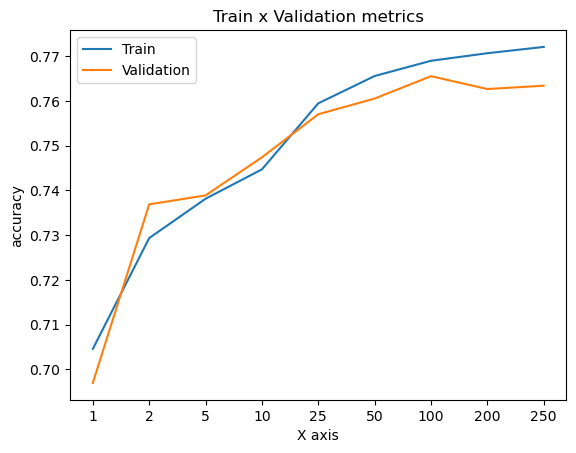

In [47]:
n_est = [1, 2, 5, 10, 25, 50, 100, 200, 250]

accuracy_list_train = []
accuracy_list_test = []

for i in n_est:
    model = AdaBoostClassifier(n_estimators= i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_est )),labels=n_est)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# 100 is optimal number of estimators

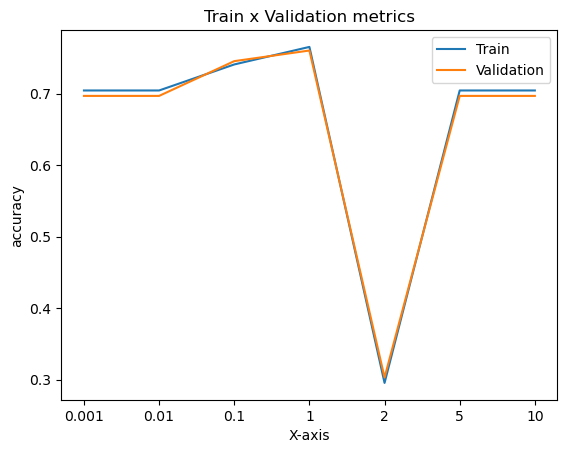

In [51]:
lr = [0.001, 0.01, 0.1, 1, 2, 5, 10]

accuracy_list_train = []
accuracy_list_test = []

for i in lr:
    model = AdaBoostClassifier(learning_rate = i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(lr )),labels=lr)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# thus, the ideal value for lr will be 1

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

bag__best = AdaBoostClassifier(algorithm='SAMME', 
                              estimator=RandomForestClassifier(),
                              n_estimators = 100,
                              learning_rate = 1,
                              random_state=42)

bag__best.fit(X_train_sc, y_train)
accuracy_score(bag__best.predict(X_test_sc), y_test)

0.810875

In [26]:
pred1 = bag__best.predict(testdata_sc)
ids = ss.iloc[:, 0]

df = pd.DataFrame({"ID": ids,
                  "smoking": pred1})

In [28]:
# df.to_csv("submission1.csv", index=False)

In [39]:
from xgboost import XGBClassifier

In [44]:
xg = XGBClassifier(random_state=42)

xg.fit(X_train_sc, y_train)
accuracy_score(xg.predict(X_test_sc), y_test)

0.778375

In [41]:
params = xg.get_params()
params

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

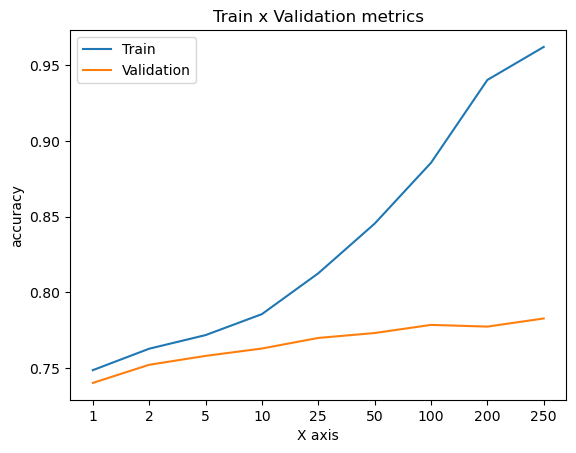

In [45]:
n_est = [1, 2, 5, 10, 25, 50, 100, 200, 250]

accuracy_list_train = []
accuracy_list_test = []

for i in n_est:
    model = XGBClassifier(n_estimators= i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_est )),labels=n_est)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# 10 is optimal

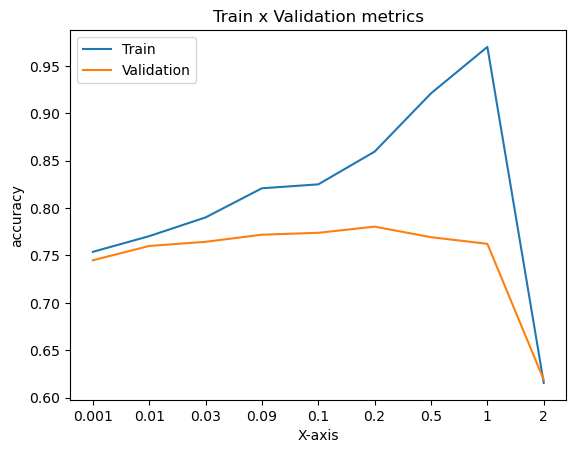

In [47]:
lr = [0.001, 0.01, 0.03, 0.09, 0.1, 0.2, 0.5, 1, 2]

accuracy_list_train = []
accuracy_list_test = []

for i in lr:
    model = XGBClassifier(learning_rate = i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(lr )),labels=lr)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# optimal value is 0.01

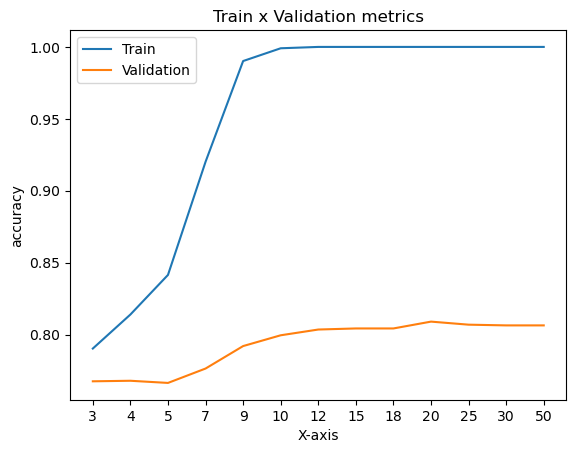

In [48]:
max_depth = [3, 4, 5, 7, 9, 10, 12, 15, 18, 20, 25, 30, 50]

accuracy_list_train = []
accuracy_list_test = []

for i in max_depth:
    model = XGBClassifier(max_depth = i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth)),labels=max_depth)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])


In [ ]:
# optimal vakue wil be 3

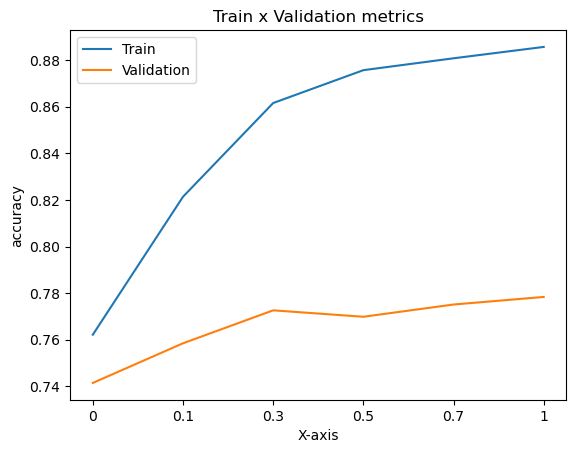

In [49]:
cosp_b = [0, 0.1, 0.3, 0.5, 0.7, 1]

accuracy_list_train = []
accuracy_list_test = []

for i in cosp_b:
    model = XGBClassifier( colsample_bytree = i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(cosp_b )),labels=cosp_b)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# value can be 0.1
# con considered

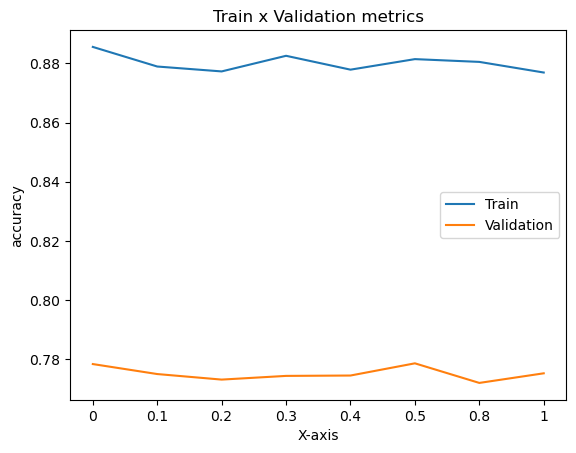

In [52]:
gamm = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1]

accuracy_list_train = []
accuracy_list_test = []

for i in gamm:
    model = XGBClassifier(gamma = i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(gamm)),labels=gamm)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# optimal value of gamma will be 0.5

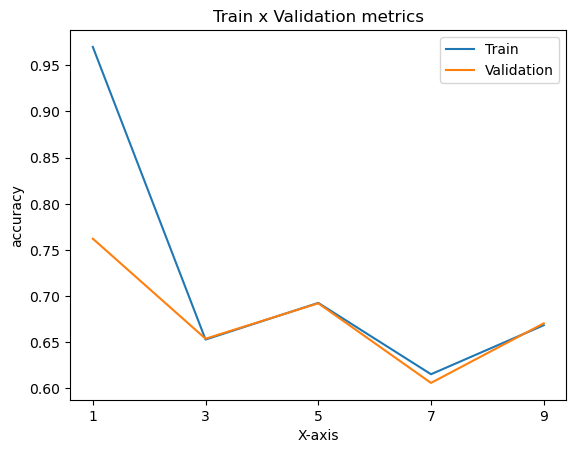

In [53]:
min_child = [1, 3, 5, 7, 9]

accuracy_list_train = []
accuracy_list_test = []

for i in min_child:
    model = XGBClassifier(learning_rate = i, random_state=42)
    model.fit(X_train_sc, y_train)
    accuracy_list_train.append(accuracy_score(model.predict(X_train_sc), y_train))
    accuracy_list_test.append(accuracy_score(model.predict(X_test_sc), y_test))


plt.title('Train x Validation metrics')
plt.xlabel('X-axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_child )),labels=min_child)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# optimal vlaue will be 5

In [61]:
xg_best = XGBClassifier(n_estimators = 10, 
                       learning_rate = 0.01,
                       max_depth = 3,
                       gamma = 0.5,
                       min_child_weight = 5)

xg_best.fit(X_train_sc, y_train)
accuracy_score(xg_best.predict(X_test_sc), y_test)

0.735375

In [63]:
pred2 = xg_best.predict(testdata_sc)
ids = ss.iloc[:, 0]

df = pd.DataFrame({"ID": ids,
                  "smoking": pred2})

In [67]:
df.to_csv("submission2.csv", index=False)

In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [74]:
classifier = XGBClassifier()

In [80]:
params={
 "n_estimators"     : [1, 2, 4, 7, 10, 20, 50, 100],
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.5, 0.8, 1] ,
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4, 0.5],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
    
}

In [76]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [107]:
random_search.fit(X_train_sc, y_train)
accuracy_score(xg_best.predict(X_test_sc), y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.735375

In [85]:
best_param = random_search.best_params_
best_param

{'n_estimators': 7,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [109]:
xg_best_ = XGBClassifier(n_estimators = 7,
 min_child_weight = 3,
 max_depth = 5,
 learning_rate = 0.3,
 gamma = 0.3,
 colsample_bytree= 0.7)

In [110]:
xg_best_.fit(X_train_sc, y_train)
accuracy_score(xg_best_.predict(X_test_sc), y_test)

0.762375

In [111]:
pred3 = xg_best_.predict(testdata_sc)
ids = ss.iloc[:, 0]

df = pd.DataFrame({"ID": ids,
                  "smoking": pred3})

In [112]:
df.to_csv("submission3.csv", index=False)

[CV 1/5] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.844 total time=   1.9s
[CV 5/5] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.845 total time=   1.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.01, max_depth=15, min_child_weight=3, n_estimators=20;, score=0.853 total time=   3.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50;, score=0.856 total time=   1.9s
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=4;, score=0.821 total time=   0.3s
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1, n_estimators=4;, score=0.821 total time=   0.3s
[CV 2/5] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=12, min_child_weight=7, n_estimators=2;, sc

**Models Explored and their Corresponding Accuracy**


BaggingClassifier - 0.78

best BaggingClassifier - 0.76



adaboost - 0.63

best adaboost - 81



xgboost - 0.77

best xgboost - 0.73